In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [3]:
class AgentState(TypedDict):
    number1: int
    operationA: str
    number2: int
    number3: int
    operationB: str
    number4: int
    final_result: int

In [5]:
def adder_1(state: AgentState) -> AgentState:
    state["final_result"] = state["number1"] + state["number2"]
    return state

def subtractor_1(state: AgentState) -> AgentState:
    state["final_result"] = state["number1"] - state["number2"]
    return state

def adder_2(state: AgentState) -> AgentState:
    state["final_result"] = state["number3"] + state["number4"]
    return state

def subtractor_2(state: AgentState) -> AgentState:
    state["final_result"] = state["number3"] - state["number4"]
    return state

def router_1(state: AgentState) -> AgentState:
    if state["operationA"] == "+":
        return "adder_1"
    else:
        return "subtractor_1"

def router_2(state: AgentState) -> AgentState:
    if state["operationB"] == "+":
        return "adder_2"
    else:
        return "subtractor_2"



In [11]:
graph = StateGraph(AgentState)

graph.add_node("adder_1", adder_1)
graph.add_node("subtractor_1", subtractor_1)
graph.add_node("adder_2", adder_2)
graph.add_node("subtractor_2", subtractor_2)

graph.add_node("router_1", lambda state: state)
graph.add_node("router_2", lambda state: state)

graph.add_edge(START, "router_1")

graph.add_conditional_edges(
    "router_1",
    router_1,
    {
        "adder_1": "adder_1",
        "subtractor_1": "subtractor_1",
    }
)

graph.add_edge("adder_1", "router_2")
graph.add_edge("subtractor_1", "router_2")

graph.add_conditional_edges(
    "router_2",
    router_2,
    {
        "adder_2": "adder_2",
        "subtractor_2": "subtractor_2",
    }
)

app = graph.compile()

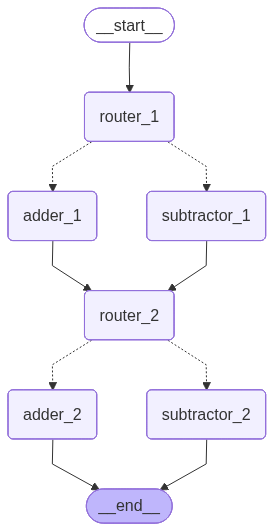

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
res = app.invoke({"number1": 1, "operationA": "+", "number2": 2, "number3": 3, "operationB": "-", "number4": 4})

In [10]:
print(res)

{'number1': 1, 'operationA': '+', 'number2': 2, 'number3': 3, 'operationB': '-', 'number4': 4, 'final_result': -1}
